In [1]:
import os
files = []
for root, dirs, files in os.walk("No Videos"):
    for filename in files:
            if filename.endswith(('.csv')):
                files.append(os.path.join(root, filename))

Traceback (most recent call last):
  File "/Users/ahmed.elsafty/Uni/ahmed2vec/venv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1120, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/ahmed.elsafty/Uni/ahmed2vec/venv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 301, in wrapped
    return f(*args, **kwargs)
  File "/Users/ahmed.elsafty/Uni/ahmed2vec/venv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 346, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1044, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py", line 1004, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/System/Library/Framewo

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

In [ ]:
%%capture
import pandas as pd
df = pd.DataFrame()
list_ = []
for f in files:
    fpd = pd.read_csv(f,index_col=None, header=0)
    fpd.participantId = os.path.dirname(f).split('/')[-1]
    list_.append(fpd)
frame = pd.concat(list_)

In [ ]:
frame.head()

,participantId,condition,timeSinceStartup,correctNodeHit,keypressed,calibrationData,bubbleSize,numberNodes,targetNode,currentSelectedNode,currentState,correctedEyeX,correctedEyeY,rawEyeX,rawEyeY
0,1,NaN,3.825378,NaN,HAPRING_TIP,noCalibrationDataSet,NaN,0.0,NaN,-1.0,Introduction,0.0,0.0,960.0,540.0
1,1,NaN,7.018346,NaN,HAPRING_TIP,noCalibrationDataSet,NaN,0.0,NaN,-1.0,Introduction,0.0,0.0,960.0,540.0
2,1,NaN,7.033599,NaN,NaN,noCalibrationDataSet,NaN,0.0,NaN,-1.0,Introduction,0.0,0.0,960.0,540.0
3,1,NaN,7.034281,NaN,NaN,noCalibrationDataSet,NaN,0.0,NaN,-1.0,Introduction,0.0,0.0,960.0,540.0
4,1,NaN,7.036498,NaN,NaN,noCalibrationDataSet,NaN,0.0,NaN,-1.0,Introduction,0.0,0.0,960.0,540.0


In [ ]:
frame.condition.unique()

array([nan, 'WITHCUSTOMCALIB', 'MOUSE', 'EYE', 'noCalibrationDataSet'], dtype=object)

In [ ]:
import numpy as np
df  = pd.DataFrame(frame, columns=['participantId', 'condition','timeSinceStartup']).groupby(['participantId', 'condition'])

total_time_df = df.agg({'condition': 'first','timeSinceStartup': lambda x: max(x) - min(x)})
total_time_df = total_time_df[total_time_df.condition.isin(['WITHCUSTOMCALIB', 'MOUSE', 'EYE'])]

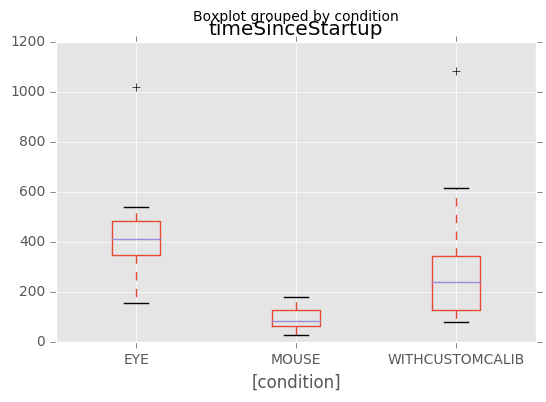

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame.boxplot(total_time_df, by='condition')
plt.show()